 ## HW3 - EuroSAT Land Use and Land Cover Classification using Deep Learning

Nissim Lebovits
March 17, 2023

In this homework your task is to implement traditional and DL models to solve a typical problem in satellite imaging  using a benchmark dataset.


### Notes:

For this assignment, I have used a number of additional sources, including [this Kaggle tutorial](https://www.kaggle.com/code/nilesh789/land-cover-classification-with-eurosat-dataset), ChatGPT, and Github Copilot.

### S1: Reading and preparing the data

- Visit the EuroSAT data description page and download the data: https://github.com/phelber/eurosat

- Create input data and labels for training and testing (X_tr, y_tr, X_te, y_te). 

    - We will only use the categories "Forest (F)", "Residential (R)" and "Industrial (I)"

    - The data will be split into training (60%) and testing sets (40%), stratified on class labels (equal percentage of each category in train and test sets)
    
    - The data matrix X will be a 2D matrix with size m x n, where m: number of samples, n: number of flattened image pixels
    
    - Images will be directly read as "grayscale" (single image channel, scaled to values 0 to 1). You can use:
    
    > from skimage import io
    
    > img = io.imread(img_name, as_gray=True)
    
    - The labels will be converted to values 0: Forest, 1:Residential, 2:Industrial


Q1.1: What are the shapes of X_tr, y_tr, X_te and y_te variables?

### S1: Reading and preparing the data

First, we'll import some libraries that we'll be using.

In [4]:
# Importing few libraries
import os
import shutil
import random
from tqdm import tqdm

import numpy as np
import pandas as pd

import PIL
import seaborn as sns
import matplotlib.pyplot as plt

Next, we'll read in the EuroSAT dataset. We can quickly explore it and then filter it for the desired categories. First, we'll simply look at the labels.

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds

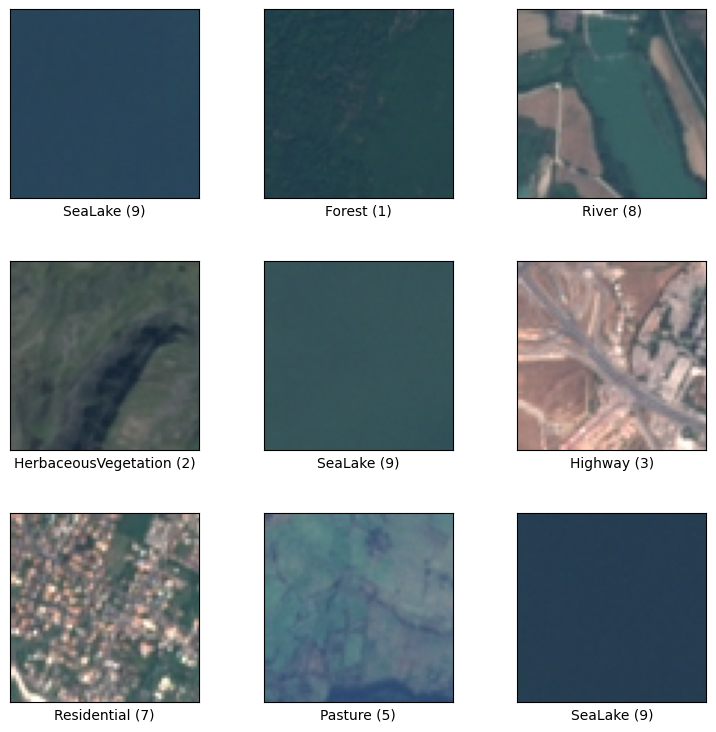

In [22]:
DATA_DIR = "/kaggle/input/"

ds, ds_info = tfds.load('eurosat/rgb',
                        with_info=True,
                        split='train[60%:]', # 60% train, 40% test
                        data_dir=DATA_DIR)

tfds.show_examples(ds, ds_info);

In [7]:
print(ds_info)

tfds.core.DatasetInfo(
    name='eurosat',
    full_name='eurosat/rgb/2.0.0',
    description="""
    EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
    bands and consisting of 10 classes with 27000 labeled and
    geo-referenced samples.
    
    Two datasets are offered:
    - rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
    - all: Contains all 13 bands in the original value range (float32).
    
    URL: https://github.com/phelber/eurosat
    """,
    config_description="""
    Sentinel-2 RGB channels
    """,
    homepage='https://github.com/phelber/eurosat',
    data_path='/kaggle/input/eurosat\\rgb\\2.0.0',
    file_format=tfrecord,
    download_size=89.91 MiB,
    dataset_size=89.50 MiB,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=string),
        'image': Image(shape=(64, 64, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('i

In [21]:
# Get the training data
train_data = ds['train']

# Convert the dataset to a NumPy array
train_array = np.concatenate([batch['image'] for batch in train_data.as_numpy_iterator()])

# Print the shape of the NumPy array
print('Shape of the NumPy array:', train_array.shape)

TypeError: 'PrefetchDataset' object is not subscriptable

In [18]:
type(ds)

tensorflow_datasets.core.dataset_utils._IterableDataset

In [ ]:
DATASET = "C:/Users/Nissim/Desktop/Spring 2023/Remote Sensing/MUSA-650_Spring2023/EuroSAT_RGB/EuroSat(1)"

LABELS = os.listdir(DATASET)
print(LABELS)

Now we can plot a selection of the images by class to get a sense of what they look like

In [ ]:
img_paths = [os.path.join(DATASET, l, l+'_1000.jpg') for l in LABELS]

img_paths = img_paths + [os.path.join(DATASET, l, l+'_2000.jpg') for l in LABELS]

def plot_sat_imgs(paths):
    plt.figure(figsize=(15, 8))
    for i in range(20):
        plt.subplot(4, 5, i+1, xticks=[], yticks=[])
        img = PIL.Image.open(paths[i], 'r')
        plt.imshow(np.asarray(img))
        plt.title(paths[i].split('/')[-2])

plot_sat_imgs(img_paths)

From here, we'll want to filter

Visit the EuroSAT data description page and download the data.

In [3]:
# Define the path to the folder containing the images
data_dir = '/path/to/Homeworks/EuroSAT_RGB'

# Define the parameters for the image dataset
image_size = (256, 256)
batch_size = 32

# Use image_dataset_from_directory to create the image dataset
image_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

NotFoundError: Could not find directory /Homeworks/EuroSAT_RGB

Import EuroSAT dataset via the `torchgeo` library.

In [ ]:
import torchgeo
import os
import tempfile
from torch.utils.data import DataLoder
from torchgeo.datasets import

### S2: Binary classifiers

- Implement three binary SVM classifiers (use a linear kernel and default parameters) to classify [F vs R], [F vs I] and [R vs I]

- Calculate classification accuracy of each classifier on the test data

- Plot the ROC curve of each classifier and calculate the AUC on the test data

Q2.1: What is the classification accuracy of each classifier?

Q2.2: What is the AUC of each classifier?

Q2.3: Show one image that is mis-classified by each classifier.

### S3: Multi-class classifier via majority voting of binary classifiers

- Combine the models trained in S2 to create a 3-class classifier. The combined model will apply each one of the 3 classifiers on the testing data and will apply majority voting to decide the final class of the test sample.

- Calculate classification accuracy of the 3-class classifier on the test data.

Q3.1: What is the classification accuracy of the classifier?


### S4: Multi-class Random-Forest classifier

- Train a Random-Forest classifier to classify the data into one of the three classes. Use the training data.

- Apply the trained model on testing data.

Q4.1: What is the classification accuracy of the classifier?

Q4.2: Plot the confusion matrix.



### S5: Fully connected neural network

- Implement a deep learning model with fully connected layers, using a single intermediate layer with 128 nodes (i.e: input layer + intermediate layer + output layer).

Q5.1: Visualize the network architecture. Refer to https://faroit.com/keras-docs/2.0.8/visualization/ to see the import command and function needed to visualize the architecture.

Q5.2: Calculate validation accuracy using the test data as the validation set.

### S6: Variations of network architectures

- Compare the previous network to an alternative one using 4 intermediate layers with 32 nodes in each.

Q6.1: Which network has more parameters to learn? How many more parameters?

Q6.2: Which network obtained higher validation accuracy?